# Exploratory Data Analysis on 2021 Stack Overflow Survey Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## store dataframe as df and also set the maximum number of columns to 50
df = pd.read_csv('C:\\Users\\USER\\Desktop\\StackOverflow\\survey_results_public.csv')
df.head()
pd.set_option('display.max_columns', 50)

In [3]:
##checking the schema for the files
schema_df = pd.read_csv('C:\\Users\\USER\\Desktop\\StackOverflow\\survey_results_schema.csv')
schema_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [4]:
## Identifying the columns 
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [6]:
## checking for null values 
df.isnull().sum()

ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWith           6618
DatabaseHaveWorkedWith          13893
DatabaseWantToWorkWith          25140
PlatformHaveWorkedWith          31304
PlatformWantToWorkWith          41820
WebframeHaveWorkedWith          21732
WebframeWantToWorkWith          31344
MiscTechHaveWorkedWith          36384
MiscTechWantToWorkWith          45418
ToolsTechHav

In [28]:
## checking to see if there is any duplicated column
df.duplicated().sum()

0

In [7]:
df['LanguageHaveWorkedWith'].head()

0    C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                JavaScript;Python
2                         Assembly;C;Python;R;Rust
3                            JavaScript;TypeScript
4                   Bash/Shell;HTML/CSS;Python;SQL
Name: LanguageHaveWorkedWith, dtype: object

In [8]:
 ## checking the parts of the survey that worked with python
python=  df['LanguageHaveWorkedWith'].str.contains('Python', na = False)
df.loc[python]
 

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,Apache Spark;Hadoop;NumPy;Pandas,Hadoop;NumPy;Pandas,Docker;Git;Kubernetes;Yarn,Docker;Git;Kubernetes;Yarn,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim;Vis...,Linux-based,Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",No,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
5,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;Powe...,C#;C++;Go;HTML/CSS;Java;JavaScript;Node.js;Obj...,MySQL;PostgreSQL;SQLite,Elasticsearch;Firebase;IBM DB2;MariaDB;Microso...,NaN,NaN,Express;Flask;jQuery;React.js,Express;Flask;jQuery;React.js,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;Qt;React Native;TensorFlow;...,Git,Docker;Git;Unity 3D;Unreal Engine,IPython/Jupyter;Notepad++;PyCharm;Sublime Text...,Android Studio;IPython/Jupyter;Vim;Visual Stud...,Windows,Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"Yes, 

In [9]:
## Identifying the full meaning of the column names using the schema_df
schema_df[['qname', 'question']]

,qname,question
0,S0,"<div><span style=""font-size:19px;""><strong>Hel..."
1,MetaInfo,Browser Meta Info
2,S1,"<span style=""font-size:22px; font-family: aria..."
3,MainBranch,Which of the following options best describes ...
4,Employment,Which of the following best describes your cur...
5,Country,"Where do you live? <span style=""font-weight: b..."
6,US_State,<p>In which state or territory of the USA do y...
7,UK_Country,In which part of the United Kingdom do you liv...
8,S2,"<span style=""font-size:22px; font-family: aria..."
9,EdLevel,Which of the following best describes the high...


In [49]:
## renaming the comptotal  as the salary
df.rename(columns = {'CompTotal': 'Salary'}, inplace = True)
df.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,Salary,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",UK,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,Apache Spark;Hadoop;NumPy;Pandas

## using the grouby and get_group function
df['Country'].value_counts()

In [54]:
country_grp = df.groupby(['Country'])


In [55]:
## Used the get_group function to get the survey of developers from Nigeria 
country_grp.get_group('Nigeria')

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,Salary,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
109,110,I am a developer by profession,Employed full-time,Nigeria,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc...",8,3,"Developer, mobile;Developer, front-end;Develop...",10 to 19 employees,NGN\tNigerian naira,150000.0,Monthly,HTML/CSS;JavaScript;Python,NaN,MySQL;PostgreSQL;Redis,NaN,DigitalOcean,NaN,Angular.js;Django;React.js,NaN,React Native,NaN,Docker,Docker,Android Studio;PyCharm;Vim;Visual Studio,Android Studio;PyCharm;Vim;Visual Studio,MacOS,Visit Stack Overflow;Google it;Do other work a...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Daily or almost daily,"Yes, definitely",Yes,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,4944.0
820,821,I am a developer by profession,Employed full-time,Nigeria,NaN,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",9,Less than 1 year,"Developer, full-stack",100 to 499 employees,NGN\tNigerian naira,405000.0,Monthly,Assembly;C;C++;Go;HTML/CSS;JavaScript;Node.js;...,C;C++;HTML/CSS;JavaScript;Node.js;Python;Rust;...,MariaDB;MongoDB;MySQL;PostgreSQL;Redis,Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redis,AWS;DigitalOcean;Heroku,AWS;DigitalOcean,Express;Laravel;React.js;Vue.js,Express;React.js,NaN,NaN,Git;Yarn,Git;Unreal Engine;Yarn,Sublime Text;Visual Studio Code,Android Studio;Sublime Text;Visual Studio Code...,Linux-based,Google it;Do other work and come back later,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,A few times per month or weekly,"Yes, somewhat",Yes,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,13332.0
1069,1070,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Nigeria,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc)",2,1,"Developer, front-end;Developer, full-stack;Dev...","Just me - I am a freelancer, sole proprietor, ...",NGN\tNigerian naira,NaN,NaN,HTML/CSS;Java;JavaScript;PHP;SQL,Dart;HTML/CSS;Java;JavaScript;PHP;Python;Rust;SQL,MongoDB;MySQL,Firebase;MongoDB;MySQL;PostgreSQL;SQLite,Heroku,AWS;DigitalOcean;Google Cloud Platform;Heroku,Express;jQuery;Laravel;Vue.js,Django;Express;Laravel;Vue.js,NaN,NaN,Git,Docker;Git,Visual Studio Code,Android Studio;Visual Studio Code,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"Yes, somewhat",No,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,NaN
1120,1121,I am a student who is learning to code,"Independent contractor, freelancer, or self-em...",Nigeria,NaN,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,Other (please specify):,5,NaN,"Developer, full-stack",NaN,NaN,NaN,NaN,Dart;HTML/CSS;Java;JavaScript;Python;SQL;Swift,NaN,MySQL;PostgreSQL;Redis;SQLite,NaN,DigitalOcean;Heroku,NaN,Angular;Django;React.js,NaN,Flutter,NaN,Docker;Git;Terraform;Yarn,NaN,Android Studio;PHPStorm;Visual Studio Cod

In [57]:
## Used the normalize attribute to get the percentage of each gender in the survey
df['Gender'].value_counts( normalize = True )

Man                                                                                   0.896667
Woman                                                                                 0.049377
Prefer not to say                                                                     0.017282
nan                                                                                   0.013818
Non-binary, genderqueer, or gender non-conforming                                     0.008270
Or, in your own words:                                                                0.004950
Man;Or, in your own words:                                                            0.003212
Man;Non-binary, genderqueer, or gender non-conforming                                 0.003020
Woman;Non-binary, genderqueer, or gender non-conforming                               0.001762
Man;Woman                                                                             0.000491
Non-binary, genderqueer, or gender non-conforming;

In [64]:
agender = ['Man', 'Woman']

In [65]:
## using the isin function to identify developers that only picked Man and Woman as their gender
newfilt = df['Gender'].isin(agender)
print(df.loc[newfilt].head(5))


   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2             I am a student who is learning to code   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

                                          Employment             Country  \
0  Independent contractor, freelancer, or self-em...            Slovakia   
1                                 Student, full-time         Netherlands   
2                                 Student, full-time  Russian Federation   
3                                 Employed full-time             Austria   
4  Independent contractor, freelancer, or self-em...                  UK   

  US_State UK_Country                                            EdLevel  \
0      NaN        NaN  Secondary school (e.g. American hig

In [16]:
df.loc[newfilt,["Gender",'EdLevel']].head()

,Gender,EdLevel
0,Man,"Secondary school (e.g. American high school, G..."
1,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
2,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
3,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
4,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"


In [17]:
## checking the education level count of developers in Nigeria 

country_grp['EdLevel'].value_counts().loc['Nigeria']

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          217
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     86
Some college/university study without earning a degree                                 61
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        25
Associate degree (A.A., A.S., etc.)                                                     8
Something else                                                                          6
Primary/elementary school                                                               2
Professional degree (JD, MD, etc.)                                                      2
Other doctoral degree (Ph.D., Ed.D., etc.)                                              1
Name: EdLevel, dtype: int64

In [66]:
## sum of developers that worked with python in India in 2021 
Indie = df['Country'] == 'India'

df.loc[Indie]['LanguageHaveWorkedWith'].str.contains('Python').sum()

5233

In [19]:
## The median salary of developers in the U.s

country_grp['Salary'].median().loc['United States of America']

120000.0

In [20]:
## The Mean and Median salary of developers in Nigeria 

country_grp['Salary'].agg(['mean', 'median']).loc['Nigeria']

mean      1.170771e+06
median    2.250000e+05
Name: Nigeria, dtype: float64

In [25]:
## checking the dataset for data of Developers from the USA   using the .query attribute

df.query('Country == "United States of America"' )

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,Salary,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
5,6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;Powe...,C#;C++;Go;HTML/CSS;Java;JavaScript;Node.js;Obj...,MySQL;PostgreSQL;SQLite,Elasticsearch;Firebase;IBM DB2;MariaDB;Microso...,NaN,NaN,Express;Flask;jQuery;React.js,Express;Flask;jQuery;React.js,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;Qt;React Native;TensorFlow;...,Git,Docker;Git;Unity 3D;Unreal Engine,IPython/Jupyter;Notepad++;PyCharm;Sublime Text...,Android Studio;IPython/Jupyter;Vim;Visual Stud...,Windows,Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"Yes, somewhat",No,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN
6,7,I code primarily as a hobby,I prefer not to say,United States of America,New Hampshire,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;JavaScript,HTML/CSS;JavaScript;PHP,NaN,NaN,NaN,NaN,jQuery,jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",No,Prefer not to say,Prefer not to say,No,NaN,I don't know,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,NaN
15,16,I am a student who is learning to code,"Student, full-time",United States of America,Missouri,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,Other (please specify):,7,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell;Python,Bash/Shell;Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Git,Git,Emacs;Neovim;Vim,Neovim;Vim,Linux-based,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Less than once per month or monthly,Neutral,No,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Too long,Easy,NaN
36,37,I am a developer by profession,Employed full-time,United States of America,District of Columbia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,Less than 1 year,"Developer, embedded applications or devices",20 to 99 employees,USD\tUnited States dollar,103000.0,Yearly,Assembly;C;Java;Kotlin;Rust,Assembly;Kotlin;Rust;SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Git,Git,IntelliJ;PyCharm;Webstorm,Android Studio;IntelliJ;PyCharm;Sublime Text;W...,Linux-based,Visit Stack Overflow;Google it;Do other work a...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",Yes,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Too short,Easy,103000.0
37,38,I am a developer by profession,Employed full-time,United States of America,Massachusetts,NaN,Some college/university study without earnin

In [27]:
## Changing the gender datatype to a string datatype
df['Gender'] = df['Gender'].astype(str)

df['Gender'].dtypes

dtype('O')

Text(0, 0.5, 'Users')

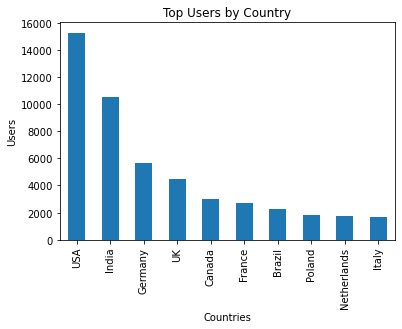

In [69]:
ax =df['Country'].value_counts(ascending = False)\
.head(10).plot(kind = 'bar', title = 'Top Users by Country')
ax.set_xlabel('Countries')
ax.set_ylabel ('Users')

The Graph shows that More Developers use stackoverflow more than any other country in the world 

In [30]:
## Used the replace function to abbreviate the name 

df['Country'].replace('United States of America', 'USA', inplace = True)

In [31]:
## Did the same for the UK

df['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'UK', inplace = True)

In [70]:
##df[['Salary','ConvertedCompYearly']]. dropna().corr()

In [35]:
df["LanguageHaveWorkedWith"].str.contains('Swift')

0         True
1        False
2        False
3        False
4        False
         ...  
83434    False
83435      NaN
83436    False
83437    False
83438    False
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

In [73]:
df['YearsCode'].replace('np.nan', 0)

0        NaN
1          7
2        NaN
3        NaN
4         17
        ... 
83434      6
83435      4
83436     10
83437      5
83438     14
Name: YearsCode, Length: 83439, dtype: object

In [75]:
df.query('MainBranch == "I am a devloper by profession"').groupby('Country')['Salary'].sum()

Series([], Name: Salary, dtype: float64)

In [39]:
df.head(10)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,Salary,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",UK,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,NaN,NaN,Flask,Flask,Apache Spark;Hadoop;NumPy;Pandas

In [41]:
df['Employment'].nunique()

9

In [42]:
df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Student, full-time', 'Employed full-time', 'Student, part-time',
       'I prefer not to say', 'Employed part-time',
       'Not employed, but looking for work', 'Retired',
       'Not employed, and not looking for work', nan], dtype=object)

In [45]:
df['OpSys'].unique()

array(['MacOS', 'Windows', 'Linux-based', 'BSD',
       'Other (please specify):', nan,
       'Windows Subsystem for Linux (WSL)'], dtype=object)

In [46]:
df['OpSys'].value_counts()

Windows                              37758
Linux-based                          21088
MacOS                                20984
Windows Subsystem for Linux (WSL)     2743
Other (please specify):                575
BSD                                    146
Name: OpSys, dtype: int64